From Daily Prediction To Hourly Prediction
--

This is a companion script to **traffic_nondiff_V3.0**.
This script uses daily prediction, hourly traffic clean and po_date to predict hourly traffic.

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
store_list = [7, 8, 9, 10, 14, 17, 18, 19, 25, 31, 32, 34, 35, 37, 41, 43, 48, 49, 54, 55, 57, 60, 62, 63, 64, 70, 71, 72, 73, 75, 77, 79, 84, 86, 89, 91, 95, 96, 97, 101, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 117, 118, 119, 121, 123, 125, 126, 127, 129, 130, 132, 134, 136, 138, 139, 140, 141, 143, 147, 148, 149, 153, 154, 155, 156, 158, 159, 160, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 182, 183, 184, 185, 186, 187, 188, 189, 191, 193, 195, 196, 197, 198, 202, 204, 205, 206, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 244, 247, 248, 249, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 262, 263, 264, 265, 266, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 280, 282, 283, 284, 285, 286, 287, 288, 289, 290, 292, 293, 296, 297, 298, 299, 301, 302, 303, 304, 305, 306, 307, 308, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 323, 324, 325, 326, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 367, 368, 369, 370, 371, 372, 373, 377, 379, 380, 381, 382, 383, 384, 385, 386, 388, 389, 394, 395, 397, 398, 399, 401, 403, 405, 406, 407, 408, 409, 411, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 425, 426, 427, 428, 429, 430, 431, 432, 433, 435, 436, 437, 438, 439, 440, 441, 442, 444, 445, 446, 447, 449, 450, 451, 453, 454, 455, 456, 457, 458, 460, 461, 462, 463, 464, 465, 466, 468, 469, 470, 471, 472, 473, 474, 475, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 493, 494, 495, 496, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 537, 538, 539, 540, 542, 544, 545, 547, 548, 549, 550, 551, 552, 553, 555, 557, 559, 560, 562, 563, 564, 565, 567, 568, 569, 570, 571, 574, 575, 576, 577, 579, 581, 584, 585, 586, 587, 588, 589, 590, 591, 593, 595, 596, 598, 601, 602, 605, 608, 609, 611, 612, 613, 614, 615, 616, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 630, 631, 633, 634, 636, 638, 639, 640, 642, 643, 644, 645, 646, 652, 653, 654, 656, 657, 658, 659, 662, 663, 664, 667, 668, 669, 673, 674, 675, 677, 678, 679, 680, 681, 682, 685, 686, 687, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 701, 702, 703, 704, 705, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 720, 721, 722, 723, 724, 725, 726, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 745, 746, 747, 748, 749, 752, 753, 755, 756, 757, 758, 759, 760, 761, 762, 763, 765, 766, 767, 768, 769, 770, 771, 773, 774, 776, 777, 778, 779, 780, 782, 783, 784, 785, 786, 787, 788, 790, 795, 796, 797, 798, 799, 951, 952, 953, 954, 955, 956, 957, 958, 960, 962, 963, 964, 967, 968, 969, 971, 973, 975, 976, 977, 980, 981, 982, 983, 985, 986, 987, 988, 990, 991, 992, 994, 995, 997, 998, 1002, 1003, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1027, 1028, 1030, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1040, 1041, 1042, 1043, 1045, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1055, 1056, 1057, 1058, 1059, 1060, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1075, 1076, 1077, 1078, 1079, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1089, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1115, 1117, 1118, 1119, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1145, 1147, 1149, 1151, 1153, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1165, 1166, 1167, 1169, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1202, 1203, 1204, 1205, 1207, 1209, 1211, 1212, 1215, 1216, 1217, 1219, 1221, 1223, 1224, 1225, 1227, 1228, 1230, 1232, 1233, 1236, 1237, 1238, 1240, 1241, 1242, 1243, 1245, 1249, 1250, 1253, 1255, 1256, 1257, 1261, 1262, 1264, 1265, 1266, 1267, 1268, 1269, 1272, 1275, 1277, 1279, 1281, 1282, 1283, 1284, 1285, 1286, 1288, 1290, 1291, 1292, 1293, 1294, 1295, 1300, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1324, 1326, 1327, 1328, 1329, 1330, 1332, 1334, 1340, 1342, 1343, 1347, 1349, 1350, 1352, 1353, 1354, 1355, 1356, 1357, 1359, 1361, 1362, 1363, 1365, 1370, 1372, 1373, 1374, 1377, 1378, 1381, 1382, 1383, 1385, 1386, 1388, 1389, 1390, 1391, 1393, 1394, 1395, 1396, 1397, 1399, 1400, 1401, 1403, 1404, 1405, 1407, 1408, 1409, 1410, 1411, 1413, 1415, 1416, 1418, 1419, 1420, 1421, 1422, 1424, 1425, 1426, 1428, 1429, 1430, 1431, 1432, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1445, 1447, 1453, 1454, 1455, 1456, 1458, 1462, 1463, 1466, 1467, 1468, 1469, 1470, 1474, 1476, 1480, 1481, 1482, 1483, 1484, 1487, 1492, 1493, 1494, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1506, 1507, 1508, 1510, 1515, 1516, 1517, 1518, 1519, 1520, 1522, 1529, 1530]

## Calculate Hourly Traffic From Daily Traffic Prediction

In [3]:
def HourlyPercent(x0, x1):
    if x1 == 0:
        return 0
    else:
        return round(x0 / x1, 4)
    
def GetAPE(x0, x1):
    if x0 == 0:
        return 0
    else:
        return (x1 - x0) / x0
    
def diffHourly(x0, x1):
    if x0 == 0:
        return 0
    else:
        return abs(x0 - x1)
    
def getWmape(x0, x1):
    if x1 == 0:
        return 0
    else:
        return x0 / x1

### Do for one store

In [ ]:
directory_daily = './Clean_Daily_V311_APE_XGB_9_70_3_03'
directory_hourly = './Clean_Daily2Hourly_V311_APE_XGB_9_70_3_03'

In [4]:
store_id = 7
d = {}
d['store'] = []
d['WMAPE'] = []

# Read in daily prediction, hourly historic data and calculdated po_dates.
daily = pd.read_csv(directory + '/Error_APE_' + str(store_id) + '.csv')
daily.rename(columns={'pred':'pred_daily'}, inplace=True)
daily['trn_sls_dte'] = pd.to_datetime(daily['Date'], infer_datetime_format=True)
daily['Date'] = daily['trn_sls_dte'].dt.strftime("%Y-%m-%d")

# Read in hourly data and Fix Date as String
hourly = pd.read_csv('./StoreHourlyTrafficCleanPrediction/HourTrafficCleanPredict_' + str(store_id) + '.csv')
hourly['trn_sls_dte'] = pd.to_datetime(hourly['Date'], infer_datetime_format=True)
hourly['Date'] = hourly['trn_sls_dte'].dt.strftime("%Y-%m-%d")

# Read in PO Date and Fix Date as String
po_date = pd.read_csv('../PythonCodes/po_date_heuristic_v1.csv')
po_date = po_date[['CAL_EVNT_DTE', 'computed_po_date']].copy()
po_date.rename(columns={'CAL_EVNT_DTE':'Date', 'computed_po_date':'po_date'}, inplace=True)
po_date['trn_sls_dte'] = pd.to_datetime(po_date['Date'], infer_datetime_format=True)
po_date['Date'] = po_date['trn_sls_dte'].dt.strftime("%Y-%m-%d")

# Get po_date for hourly dataset.
hourly = hourly.merge(po_date, on='Date', how='left')

# Get PO Traffic.
hourly_with_PO = pd.merge(hourly[['STR_ID', 'Date', 'SALEHOUR', 'IN_Clean', 'po_date']],
                  hourly[['Date', 'SALEHOUR', 'IN_Clean']], 
                  left_on=['po_date', 'SALEHOUR'],
                  right_on=['Date', 'SALEHOUR'],
                  suffixes=('', '_po'),
                  how='left')

# Get PO Daily Sum
hourly_DailySum = hourly[['Date', 'IN_Clean']].groupby('Date').agg({'IN_Clean':np.sum}).reset_index()
hourly_DailySum_po = hourly_DailySum.copy()

hourly_DailySum.rename(columns={'IN_Clean':'IN_Clean_Daily'}, inplace=True)
hourly_DailySum_po.rename(columns={'Date':'Date_po', 'IN_Clean':'IN_Clean_po_Daily'}, inplace=True)

# Join to Get Daily Sum
hourly_PO_daily = hourly_with_PO.merge(hourly_DailySum, on=['Date'], how='left')

# Join PO Daily Sum with Hourly to Get Distribution.
hourly_PO_daily = hourly_PO_daily.merge(hourly_DailySum_po, on=['Date_po'], how='left')
hourly_PO_daily['hourly_percent'] = hourly_PO_daily['IN_Clean_po'] / hourly_PO_daily['IN_Clean_po_Daily']

# Join with Daily Prediction, Get hourly prediciton
hourly_pred = hourly_PO_daily.merge(daily[['Date', 'fscl_mn_id', 'pred_daily']], on=['Date'], how='left')
hourly_pred['pred_hourly'] = hourly_pred['pred_daily'] * hourly_pred['hourly_percent']

# Get hourly prediction difference
hourly_pred['abs_diff_hourly'] = hourly_pred[['IN_Clean', 
                                              'pred_hourly']].apply(lambda x: diffHourly(x[0], x[1]), axis=1)

# Write hourly prediction to file
hourly_pred.to_csv(directory_hourly + '/Error_APE_' + str(store_id) + '.csv')

#########################################################################################
# Calculate WMAPE
#########################################################################################
# Sum up hourly abs_diff to get daily_abs_diff_sum
daily_abs_diff_sum = hourly_pred[['Date', 
                                  'abs_diff_hourly']].groupby('Date').agg({'abs_diff_hourly':np.sum}).reset_index()
daily_abs_diff_sum.rename(columns={'abs_diff_hourly':'daily_sum_abs_diff'}, inplace=True)

# Calculate the Weighted MAPE
df_wmape = daily_abs_diff_sum.merge(daily[['Date', 'fscl_mn_id']], on=['Date'], how='left')

# Get actual daily traffic
df_wmape = df_wmape.merge(hourly_DailySum, on=['Date'], how='left')

# Get WMAPE
df_wmape['wmape'] = df_wmape[['daily_sum_abs_diff', 
                              'IN_Clean_Daily']].apply(lambda x: getWmape(x[0], x[1]), axis=1)
df_wmape.to_csv(directory_hourly + '/Error_WMAPE_' + str(store_id) + '.csv')

# Aggregate to get monthly WMAPE
wmape_mn = df_wmape[['fscl_mn_id', 'wmape']].groupby('fscl_mn_id').agg({'wmape':np.mean}).reset_index()

t = wmape_mn.loc[wmape_mn['fscl_mn_id'] == 201807]['wmape'].values[0]
d['WMAPE'].append(t)

### For all stores

In [5]:
d = {}
d['store'] = []
d['WMAPE'] = []   
    
for store_id in store_list: 
    # Read in daily prediction, hourly historic data and calculdated po_dates.
    daily = pd.read_csv(directory + '/Error_APE_' + str(store_id) + '.csv')
    daily.rename(columns={'pred':'pred_daily'}, inplace=True)
    daily['trn_sls_dte'] = pd.to_datetime(daily['Date'], infer_datetime_format=True)
    daily['Date'] = daily['trn_sls_dte'].dt.strftime("%Y-%m-%d")

    # Read in hourly data and Fix Date as String
    hourly = pd.read_csv('./StoreHourlyTrafficCleanPrediction/HourTrafficCleanPredict_' + str(store_id) + '.csv')
    hourly['trn_sls_dte'] = pd.to_datetime(hourly['Date'], infer_datetime_format=True)
    hourly['Date'] = hourly['trn_sls_dte'].dt.strftime("%Y-%m-%d")

    # Read in PO Date and Fix Date as String
    po_date = pd.read_csv('../PythonCodes/po_date_heuristic_v1.csv')
    po_date = po_date[['CAL_EVNT_DTE', 'computed_po_date']].copy()
    po_date.rename(columns={'CAL_EVNT_DTE':'Date', 'computed_po_date':'po_date'}, inplace=True)
    po_date['trn_sls_dte'] = pd.to_datetime(po_date['Date'], infer_datetime_format=True)
    po_date['Date'] = po_date['trn_sls_dte'].dt.strftime("%Y-%m-%d")

    # Get po_date for hourly dataset.
    hourly = hourly.merge(po_date, on='Date', how='left')

    # Get PO Traffic.
    hourly_with_PO = pd.merge(hourly[['STR_ID', 'Date', 'SALEHOUR', 'IN_Clean', 'po_date']],
                      hourly[['Date', 'SALEHOUR', 'IN_Clean']], 
                      left_on=['po_date', 'SALEHOUR'],
                      right_on=['Date', 'SALEHOUR'],
                      suffixes=('', '_po'),
                      how='left')

    # Get PO Daily Sum
    hourly_DailySum = hourly[['Date', 'IN_Clean']].groupby('Date').agg({'IN_Clean':np.sum}).reset_index()
    hourly_DailySum_po = hourly_DailySum.copy()

    hourly_DailySum.rename(columns={'IN_Clean':'IN_Clean_Daily'}, inplace=True)
    hourly_DailySum_po.rename(columns={'Date':'Date_po', 'IN_Clean':'IN_Clean_po_Daily'}, inplace=True)

    # Join to Get Daily Sum
    hourly_PO_daily = hourly_with_PO.merge(hourly_DailySum, on=['Date'], how='left')

    # Join PO Daily Sum with Hourly to Get Distribution.
    hourly_PO_daily = hourly_PO_daily.merge(hourly_DailySum_po, on=['Date_po'], how='left')
    hourly_PO_daily['hourly_percent'] = hourly_PO_daily['IN_Clean_po'] / hourly_PO_daily['IN_Clean_po_Daily']

    # Join with Daily Prediction, Get hourly prediciton
    hourly_pred = hourly_PO_daily.merge(daily[['Date', 'fscl_mn_id', 'pred_daily']], on=['Date'], how='left')
    hourly_pred['pred_hourly'] = hourly_pred['pred_daily'] * hourly_pred['hourly_percent']

    # Get hourly prediction difference
    hourly_pred['abs_diff_hourly'] = hourly_pred[['IN_Clean', 
                                                  'pred_hourly']].apply(lambda x: diffHourly(x[0], x[1]), axis=1)

    # Write hourly prediction to file
    hourly_pred.to_csv(directory_hourly + '/Error_APE_' + str(store_id) + '.csv')

    #########################################################################################
    # Calculate WMAPE
    #########################################################################################
    # Sum up hourly abs_diff to get daily_abs_diff_sum
    daily_abs_diff_sum = hourly_pred[['Date', 
                                      'abs_diff_hourly']].groupby('Date').agg({'abs_diff_hourly':np.sum}).reset_index()
    daily_abs_diff_sum.rename(columns={'abs_diff_hourly':'daily_sum_abs_diff'}, inplace=True)

    # Calculate the Weighted MAPE
    df_wmape = daily_abs_diff_sum.merge(daily[['Date', 'fscl_mn_id']], on=['Date'], how='left')

    # Get actual daily traffic
    df_wmape = df_wmape.merge(hourly_DailySum, on=['Date'], how='left')

    # Get WMAPE
    df_wmape['wmape'] = df_wmape[['daily_sum_abs_diff', 
                                  'IN_Clean_Daily']].apply(lambda x: getWmape(x[0], x[1]), axis=1)

    # Aggregate to get monthly WMAPE
    wmape_mn = df_wmape[['fscl_mn_id', 'wmape']].groupby('fscl_mn_id').agg({'wmape':np.mean}).reset_index()
    wmape_mn.to_csv(directory_hourly + '/Error_WMAPE_' + str(store_id) + '.csv')

    t = wmape_mn.loc[wmape_mn['fscl_mn_id'] == 201806]['wmape'].values[0]
    d['store'].append(store_id)
    d['WMAPE'].append(t)

In [6]:
df_wmapes = pd.DataFrame(d)
df_wmapes.to_csv('Clean_Daily2Hourly_V311_APE_XGB_9_70_3_03_June_WMAPE.csv')

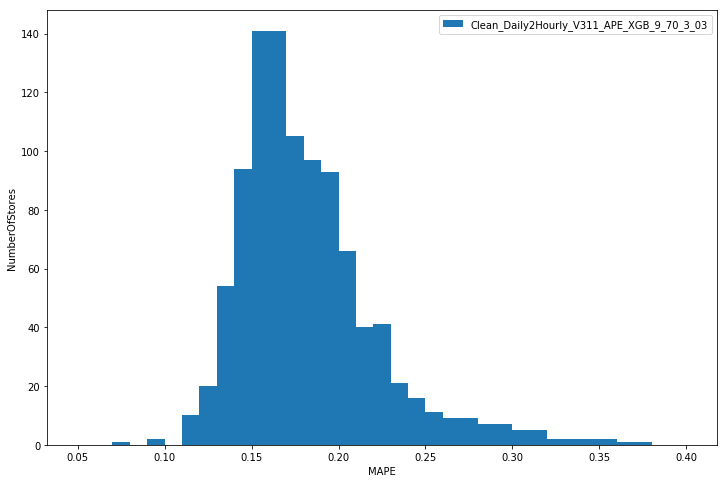

In [7]:
bins_0_1 = [0.05,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,
                                  0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.28,0.3,0.32,0.34,
                                  0.36,0.38,0.40,0.42,0.44,0.46,0.48,0.5,0.55,0.6,0.65,0.7,0.8,0.9,1.0]

bins_0_04 = [0.05,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,
                                  0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.28,0.3,0.32,0.34,
                                  0.36,0.38,0.40]
    
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
counts, bins, fig = ax1.hist(df_wmapes.WMAPE, 
                            bins=bins_0_04)

ax1.set_xlabel('MAPE')
ax1.set_ylabel('NumberOfStores')
ax1.legend(['Clean_Daily2Hourly_V311_APE_XGB_9_70_3_03'])
plt.savefig('Clean_Daily2Hourly_V311_APE_XGB_9_70_3_03.png')

In [8]:
df_wmapes.WMAPE.mean()

0.18459215077463692

In [9]:
df_wmapes.WMAPE.median()

0.1731222697065639